# Данный файл предназначен для проверки работы класса LA

In [2]:
import os
import sys
AeroBDSM_OOP_dir = os.path.abspath(os.path.join('../../..'))
if AeroBDSM_OOP_dir not in sys.path:
    sys.path.append(AeroBDSM_OOP_dir)

from isolated_plane import *
from fuselage import *
from libs.Atmosphere import atmo
from __LA import *

import matplotlib.pyplot as plt

In [3]:
plt.rcParams["font.family"] = 'serif'
plt.rcParams['font.weight'] = 'ultralight'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 16
plt.rcParams['font.style'] = 'normal'
plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams['mathtext.fontset'] = 'stix'

import warnings
warnings.filterwarnings("ignore")

In [4]:
'''Фюзеляж'''
# Геометрические параметры фюзеляжа
D = 0.31
L = 4.2
L_nos = 0.37
L_cor = 0.115   # длина кормы уменьшена до 0,1 из-за того, что крылья заходят на корму
D_dn = 0.27
r_sph = 0.0775    # 0.5 * D / 2
D_a = 0.9 * D_dn
h_s = 0e-5              # относительная высота бугорков поверхности фюзеляжа

xx_0 = 0.529            # относительная координата центра вращения в долях длины фюзеляжа (от носа) относительно которой считаются моменты
x_t = None              # относительная координата перехода пограничного слоя из ламинарного в турбулентный в долях длины фюзеляжа
T_s = None              # средняя температура поверхности фюзеляжа, К
is_active = False       # активный или пассивный (режим работы сопла на донном срезе)

S_m = pi * D**2 / 4
lambda_nos = L_nos / D
lambda_cor = L_cor / D
lambda_cil = (L - L_cor - L_nos) / D
eta_cor = D_dn / D
x_0 = xx_0 * L

nc = NosCil_SphOgi(
    lambd_nos=lambda_nos,
    lambd_cil=lambda_cil,
    D=D,
    r_sph=r_sph,    
    )
nc1 = NosCil_Ell(
    lambd_nos=lambda_nos,
    lambd_cil=lambda_cil,
    D=D    
)
cor = Cor_Con(
    D=D,
    eta_cor=eta_cor,
    lambd_cor=lambda_cor,
    D_a=D_a)
cor1 = Cor_Non(D = D, D_a = D_a)
fuselag = Fuselage(
    nosCil=nc1,
    cor=cor,
    h_s = h_s)

In [5]:
'''Передняя НП'''
# Параметры передней несущей поверхности
l = 0.248            # размах крыла [м]
b_b = 0.897            # бортовая хорда [м]
b_1 = 0.773              # концевая хорда [м]
chi_0 = radians(45)  # угол стреловидности по передней кромке [рад]

x_b = 1.94              # расстояние от носа фюзеляжа до начала бортовой хорды консоли, м

# Параметры профиля крыла
cc_b = 0.11             # относительная толщина профиля бортовой хорды [-]
cc_1 = 0.03         # относительная толщина профиля концевой хорды [-]
cc = (cc_b + cc_1) / 2  # средняя относительная толщина профиля [-]
xx_c = 0.5              # относительная координата положения максимальной толщины [-]
hb = 1e-5               # относительная высота бугорков профиля [-]
rr_0 = 0                # относительный радиус скругления передней кромки [-]
aa = 0.7                # отношение геометрического параметра профиля `a` в долях рассматриваемой хорды [-]

xx_t = None             # относительная координата перехода пограничного слоя из ламинарного в турбулентный в долях рассматриваемой хорды
T_s = None              # средняя температура поверхности крыла, К

S = (b_b + b_1) / 2 * l
lambd = l ** 2 / S
zeta = b_1 / b_b
chi_05 = atan(tan(chi_0) - 2 / lambd * (1 / zeta - 1) / (1 / zeta + 1))

Airfoil = HexProfile(b_b, cc, xx_c, aa, rr_0, hb)
IP = IsolatedPlane(S, lambd, zeta, chi_05, Airfoil)
consolesI = [ConsoleOnFuselage(IP, radians(45), x_b),
              ConsoleOnFuselage(IP, radians(135), x_b),
              ConsoleOnFuselage(IP, radians(225), x_b),
              ConsoleOnFuselage(IP, radians(315), x_b)
             ]


In [6]:
'''Задняя НП'''
# Параметры задней несущей поверхности
l = 0.248            # размах крыла [м]
b_b = 0.340             # бортовая хорда [м]
b_1 = 0.200             # концевая хорда [м]
chi_0 = radians(48.47)  # угол стреловидности по передней кромке [рад]

x_b = 3.85              # расстояние от носа фюзеляжа до начала бортовой хорды консоли, м

# Параметры руля
S_r = 0.0669            # площадь рулей
lambd_r = 0.9185        # удлинение рулей
xx_r = 0.5              # относительная координата оси вращения рулей

# Параметры профиля крыла
cc_b = 0.048            # относительная толщина профиля бортовой хорды [-]
cc_1 = 0.078            # относительная толщина профиля концевой хорды [-]
cc = (cc_b + cc_1) / 2  # средняя относительная толщина профиля [-]
xx_c = 0.5              # относительная координата положения максимальной толщины [-]
hb = 1e-5               # относительная высота бугорков профиля [-]
rr_0 = 0                # относительный радиус скругления передней кромки [-]
aa = 0.5                # отношение геометрического параметра профиля `a` в долях рассматриваемой хорды [-]

xx_t = None             # относительная координата перехода пограничного слоя из ламинарного в турбулентный в долях рассматриваемой хорды
T_s = None              # средняя температура поверхности крыла, К

S = (b_b + b_1) / 2 * l
lambd = l ** 2 / S
zeta = b_1 / b_b
chi_05 = atan(tan(chi_0) - 2 / lambd * (1 / zeta - 1) / (1 / zeta + 1))

Airfoil = HexProfile(b_b, cc, xx_c, aa, rr_0, hb)
IP = IsolatedPlane_RotatingConsoles(S, lambd, zeta, chi_05, S_r, lambd_r, xx_r, Airfoil)
consolesII = [ConsoleOnFuselage(IP, radians(45), x_b),
              ConsoleOnFuselage(IP, radians(135), x_b),
              ConsoleOnFuselage(IP, radians(225), x_b),
              ConsoleOnFuselage(IP, radians(315), x_b)
             ]

In [7]:
# Создание объекта летательного аппарата
la = LA(fuselag, consolesI, consolesII)

phi_alpha = radians(45)
delta_II = [radians(10), radians(-10), radians(-10), radians(10)]

H = 0

M06 = 0.6
M08 = 0.8
M11 = 1.1
M15 = 1.5
M2 = 2
alpha_mas = np.linspace(-20, 20, 201)

alpha_10 = -10
alpha_5 = -5
alpha0 = 0
alpha5 = 5
alpha10 = 10
M_mas = np.linspace(0.6, 2, 201)


In [8]:
cx_M06 = []
cx_M08 = []
cx_M11 = []
cx_M15 = []
cx_M2 = []

cy_M06 = []
cy_M08 = []
cy_M11 = []
cy_M15 = []
cy_M2 = []

cz_M06 = []
cz_M08 = []
cz_M11 = []
cz_M15 = []
cz_M2 = []

mx_M06 = []
mx_M08 = []
mx_M11 = []
mx_M15 = []
mx_M2 = []

my_M06 = []
my_M08 = []
my_M11 = []
my_M15 = []
my_M2 = []

mz_M06 = []
mz_M08 = []
mz_M11 = []
mz_M15 = []
mz_M2 = []

xd_M06 = []
xd_M08 = []
xd_M11 = []
xd_M15 = []
xd_M2 = []

for alf in alpha_mas:   
    M = M06
    c_x, c_y, c_z, m_x, m_y, m_z, x_d = la.get_ADCH(M, np.deg2rad(alf), phi_alpha, delta_II=delta_II, H=H, xx_0=xx_0)    
    cx_M06.append(c_x)    
    cy_M06.append(c_y)    
    cz_M06.append(c_z)
    mx_M06.append(m_x)    
    my_M06.append(m_y)    
    mz_M06.append(m_z)
    xd_M06.append(x_d)    

    M = M08
    c_x, c_y, c_z, m_x, m_y, m_z, x_d = la.get_ADCH(M, np.deg2rad(alf), phi_alpha, delta_II=delta_II, H=H, xx_0=xx_0)    
    cx_M08.append(c_x)    
    cy_M08.append(c_y)    
    cz_M08.append(c_z)
    mx_M08.append(m_x)    
    my_M08.append(m_y)    
    mz_M08.append(m_z)
    xd_M08.append(x_d)    

    M = M11
    c_x, c_y, c_z, m_x, m_y, m_z, x_d = la.get_ADCH(M, np.deg2rad(alf), phi_alpha, delta_II=delta_II, H=H, xx_0=xx_0)    
    cx_M11.append(c_x)    
    cy_M11.append(c_y)    
    cz_M11.append(c_z)
    mx_M11.append(m_x)    
    my_M11.append(m_y)    
    mz_M11.append(m_z)
    xd_M11.append(x_d)    

    M = M15
    c_x, c_y, c_z, m_x, m_y, m_z, x_d = la.get_ADCH(M, np.deg2rad(alf), phi_alpha, delta_II=delta_II, H=H, xx_0=xx_0)    
    cx_M15.append(c_x)    
    cy_M15.append(c_y)    
    cz_M15.append(c_z)
    mx_M15.append(m_x)    
    my_M15.append(m_y)    
    mz_M15.append(m_z)
    xd_M15.append(x_d)    

    M = M2
    c_x, c_y, c_z, m_x, m_y, m_z, x_d = la.get_ADCH(M, np.deg2rad(alf), phi_alpha, delta_II=delta_II, H=H, xx_0=xx_0)    
    cx_M2.append(c_x)    
    cy_M2.append(c_y)    
    cz_M2.append(c_z)
    mx_M2.append(m_x)    
    my_M2.append(m_y)    
    mz_M2.append(m_z)
    xd_M2.append(x_d)    
   

In [9]:
cx_al_10 = []
cx_al_5 = []
cx_al0 = []
cx_al5 = []
cx_al10 = []

cy_al_10 = []
cy_al_5 = []
cy_al0 = []
cy_al5 = []
cy_al10 = []

cz_al_10 = []
cz_al_5 = []
cz_al0 = []
cz_al5 = []
cz_al10 = []

mx_al_10 = []
mx_al_5 = []
mx_al0 = []
mx_al5 = []
mx_al10 = []

my_al_10 = []
my_al_5 = []
my_al0 = []
my_al5 = []
my_al10 = []

mz_al_10 = []
mz_al_5 = []
mz_al0 = []
mz_al5 = []
mz_al10 = []

xd_al_10 = []
xd_al_5 = []
xd_al0 = []
xd_al5 = []
xd_al10 = []


for M in M_mas:   
    alf = alpha_10
    c_x, c_y, c_z, m_x, m_y, m_z, x_d = la.get_ADCH(M, np.deg2rad(alf), phi_alpha, delta_II=delta_II, H=H, xx_0=xx_0)    
    cx_al_10.append(c_x)    
    cy_al_10.append(c_y)    
    cz_al_10.append(c_z)
    mx_al_10.append(m_x)    
    my_al_10.append(m_y)    
    mz_al_10.append(m_z)
    xd_al_10.append(x_d)    

    alf = alpha_5
    c_x, c_y, c_z, m_x, m_y, m_z, x_d = la.get_ADCH(M, np.deg2rad(alf), phi_alpha, delta_II=delta_II, H=H, xx_0=xx_0)    
    cx_al_5.append(c_x)    
    cy_al_5.append(c_y)    
    cz_al_5.append(c_z)
    mx_al_5.append(m_x)    
    my_al_5.append(m_y)    
    mz_al_5.append(m_z)
    xd_al_5.append(x_d)    

    alf = alpha0
    c_x, c_y, c_z, m_x, m_y, m_z, x_d = la.get_ADCH(M, np.deg2rad(alf), phi_alpha, delta_II=delta_II, H=H, xx_0=xx_0)    
    cx_al0.append(c_x)    
    cy_al0.append(c_y)    
    cz_al0.append(c_z)
    mx_al0.append(m_x)    
    my_al0.append(m_y)    
    mz_al0.append(m_z)
    xd_al0.append(x_d)    

    alf = alpha5
    c_x, c_y, c_z, m_x, m_y, m_z, x_d = la.get_ADCH(M, np.deg2rad(alf), phi_alpha, delta_II=delta_II, H=H, xx_0=xx_0)    
    cx_al5.append(c_x)    
    cy_al5.append(c_y)    
    cz_al5.append(c_z)
    mx_al5.append(m_x)    
    my_al5.append(m_y)    
    mz_al5.append(m_z)
    xd_al5.append(x_d)    

    alf = alpha10
    c_x, c_y, c_z, m_x, m_y, m_z, x_d = la.get_ADCH(M, np.deg2rad(alf), phi_alpha, delta_II=delta_II, H=H, xx_0=xx_0)    
    cx_al10.append(c_x)    
    cy_al10.append(c_y)    
    cz_al10.append(c_z)
    mx_al10.append(m_x)    
    my_al10.append(m_y)    
    mz_al10.append(m_z)
    xd_al10.append(x_d)    

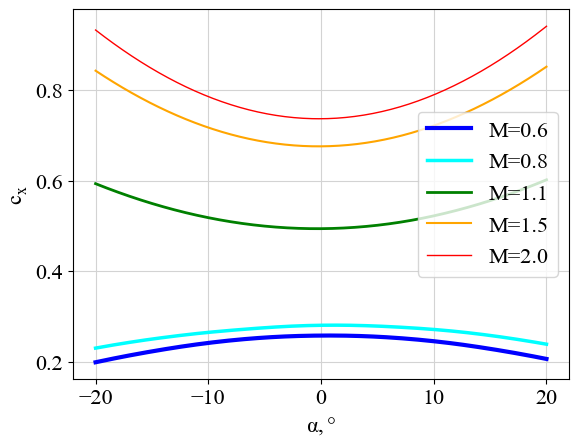

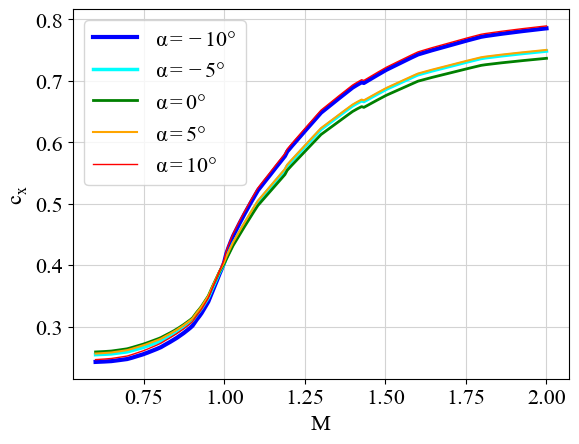

In [10]:
# Продольная сила
plt.title('')
plt.plot(alpha_mas, cx_M06, color = 'blue', lw = 3, label = 'M=0.6')
plt.plot(alpha_mas, cx_M08, color = 'cyan', lw = 2.5, label = 'M=0.8')
plt.plot(alpha_mas, cx_M11, color = 'green', lw = 2, label = 'M=1.1')
plt.plot(alpha_mas, cx_M15, color = 'orange', lw = 1.5, label = 'M=1.5')
plt.plot(alpha_mas, cx_M2, color = 'red', lw = 1, label = 'M=2.0')
plt.xlabel('$\\alpha, \degree$')
plt.ylabel('$c_{x}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
plt.savefig('plots\c_x(alpha).jpeg', facecolor='white')
plt.show()

plt.title('')
plt.plot(M_mas, cx_al_10, color = 'blue', lw = 3, label = '$\\alpha=-10\degree$')
plt.plot(M_mas, cx_al_5, color = 'cyan', lw = 2.5, label = '$\\alpha=-5\degree$')
plt.plot(M_mas, cx_al0, color = 'green', lw = 2, label = '$\\alpha=0\degree$')
plt.plot(M_mas, cx_al5, color = 'orange', lw = 1.5, label = '$\\alpha=5\degree$')
plt.plot(M_mas, cx_al10, color = 'red', lw = 1, label = '$\\alpha=10\degree$')
plt.xlabel('$M$')
plt.ylabel('$c_{x}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
plt.savefig('plots\c_x(M).jpeg', facecolor='white')
plt.show()

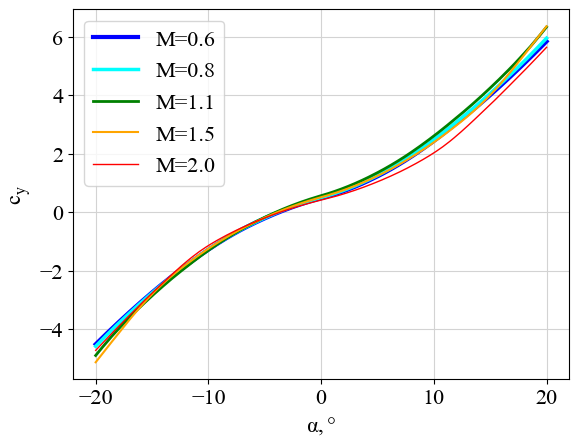

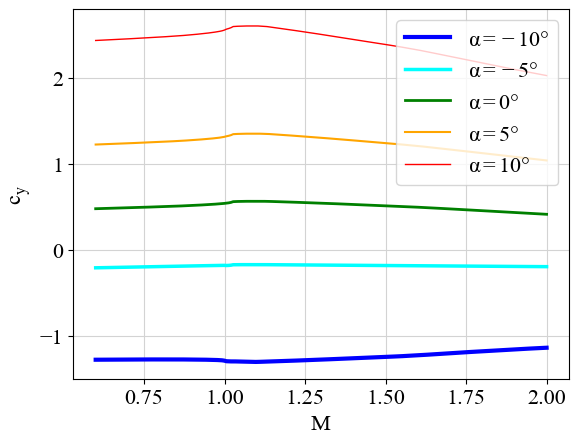

In [11]:
# Нормальная сила
plt.title('')
plt.plot(alpha_mas, cy_M06, color = 'blue', lw = 3, label = 'M=0.6')
plt.plot(alpha_mas, cy_M08, color = 'cyan', lw = 2.5, label = 'M=0.8')
plt.plot(alpha_mas, cy_M11, color = 'green', lw = 2, label = 'M=1.1')
plt.plot(alpha_mas, cy_M15, color = 'orange', lw = 1.5, label = 'M=1.5')
plt.plot(alpha_mas, cy_M2, color = 'red', lw = 1, label = 'M=2.0')
plt.xlabel('$\\alpha, \degree$')
plt.ylabel('$c_{y}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
plt.savefig('plots\c_y(alpha).jpeg', facecolor='white')
plt.show()

plt.title('')
plt.plot(M_mas, cy_al_10, color = 'blue', lw = 3, label = '$\\alpha=-10\degree$')
plt.plot(M_mas, cy_al_5, color = 'cyan', lw = 2.5, label = '$\\alpha=-5\degree$')
plt.plot(M_mas, cy_al0, color = 'green', lw = 2, label = '$\\alpha=0\degree$')
plt.plot(M_mas, cy_al5, color = 'orange', lw = 1.5, label = '$\\alpha=5\degree$')
plt.plot(M_mas, cy_al10, color = 'red', lw = 1, label = '$\\alpha=10\degree$')
plt.xlabel('$M$')
plt.ylabel('$c_{y}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
plt.savefig('plots\c_y(M).jpeg', facecolor='white')
plt.show()

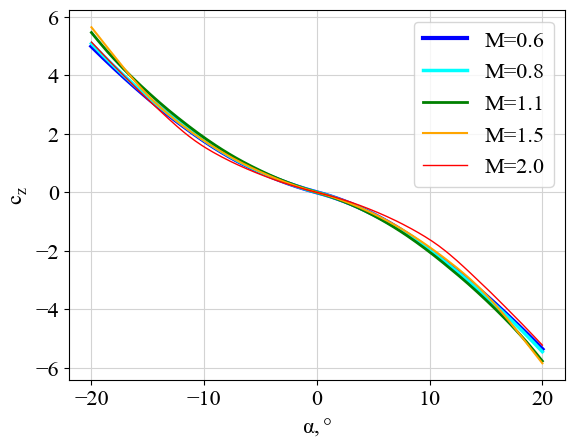

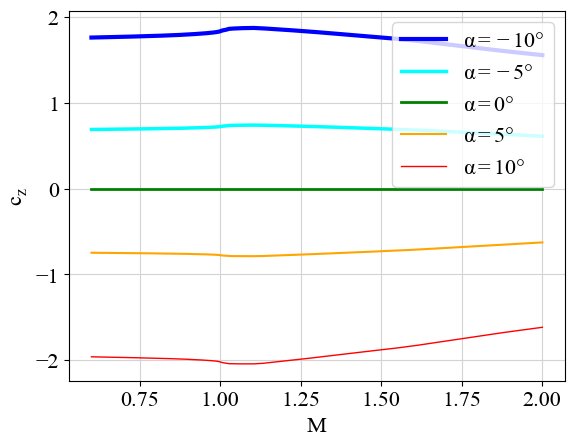

In [12]:
# Поперечная сила
plt.title('')
plt.plot(alpha_mas, cz_M06, color = 'blue', lw = 3, label = 'M=0.6')
plt.plot(alpha_mas, cz_M08, color = 'cyan', lw = 2.5, label = 'M=0.8')
plt.plot(alpha_mas, cz_M11, color = 'green', lw = 2, label = 'M=1.1')
plt.plot(alpha_mas, cz_M15, color = 'orange', lw = 1.5, label = 'M=1.5')
plt.plot(alpha_mas, cz_M2, color = 'red', lw = 1, label = 'M=2.0')
plt.xlabel('$\\alpha, \degree$')
plt.ylabel('$c_{z}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
plt.savefig('plots\c_z(alpha).jpeg', facecolor='white')
plt.show()

plt.title('')
plt.plot(M_mas, cz_al_10, color = 'blue', lw = 3, label = '$\\alpha=-10\degree$')
plt.plot(M_mas, cz_al_5, color = 'cyan', lw = 2.5, label = '$\\alpha=-5\degree$')
plt.plot(M_mas, cz_al0, color = 'green', lw = 2, label = '$\\alpha=0\degree$')
plt.plot(M_mas, cz_al5, color = 'orange', lw = 1.5, label = '$\\alpha=5\degree$')
plt.plot(M_mas, cz_al10, color = 'red', lw = 1, label = '$\\alpha=10\degree$')
plt.xlabel('$M$')
plt.ylabel('$c_{z}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
plt.savefig('plots\c_z(M).jpeg', facecolor='white')
plt.show()

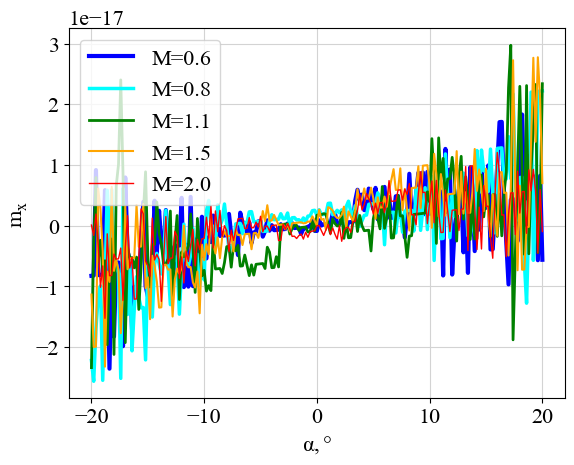

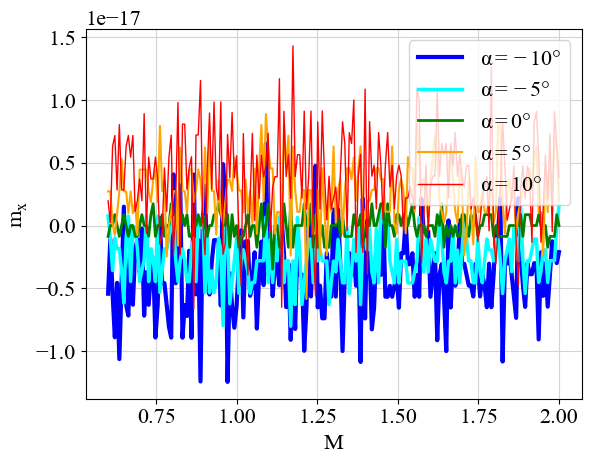

In [13]:
# Коэффициент момента крена
plt.title('')
plt.plot(alpha_mas, mx_M06, color = 'blue', lw = 3, label = 'M=0.6')
plt.plot(alpha_mas, mx_M08, color = 'cyan', lw = 2.5, label = 'M=0.8')
plt.plot(alpha_mas, mx_M11, color = 'green', lw = 2, label = 'M=1.1')
plt.plot(alpha_mas, mx_M15, color = 'orange', lw = 1.5, label = 'M=1.5')
plt.plot(alpha_mas, mx_M2, color = 'red', lw = 1, label = 'M=2.0')
plt.xlabel('$\\alpha, \degree$')
plt.ylabel('$m_{x}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
plt.savefig('plots\m_x(alpha).jpeg', facecolor='white')
plt.show()

plt.title('')
plt.plot(M_mas, mx_al_10, color = 'blue', lw = 3, label = '$\\alpha=-10\degree$')
plt.plot(M_mas, mx_al_5, color = 'cyan', lw = 2.5, label = '$\\alpha=-5\degree$')
plt.plot(M_mas, mx_al0, color = 'green', lw = 2, label = '$\\alpha=0\degree$')
plt.plot(M_mas, mx_al5, color = 'orange', lw = 1.5, label = '$\\alpha=5\degree$')
plt.plot(M_mas, mx_al10, color = 'red', lw = 1, label = '$\\alpha=10\degree$')
plt.xlabel('$M$')
plt.ylabel('$m_{x}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
plt.savefig('plots\m_x(M).jpeg', facecolor='white')
plt.show()

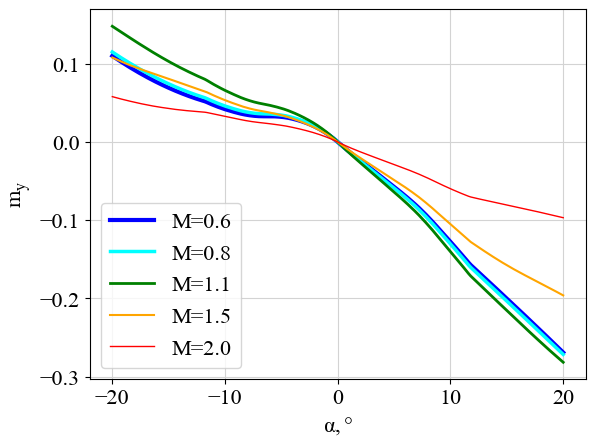

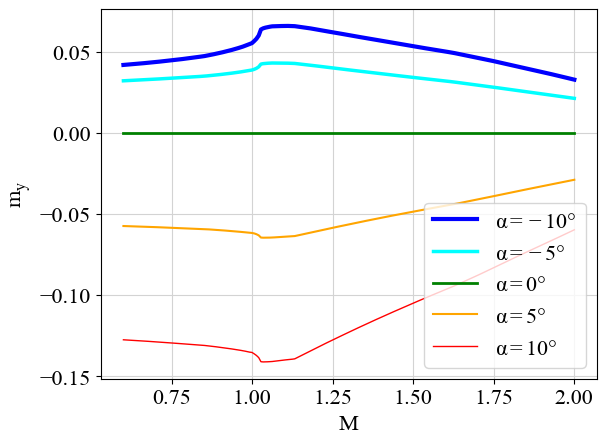

In [14]:
# Коэффициент момента рыскания
plt.title('')
plt.plot(alpha_mas, my_M06, color = 'blue', lw = 3, label = 'M=0.6')
plt.plot(alpha_mas, my_M08, color = 'cyan', lw = 2.5, label = 'M=0.8')
plt.plot(alpha_mas, my_M11, color = 'green', lw = 2, label = 'M=1.1')
plt.plot(alpha_mas, my_M15, color = 'orange', lw = 1.5, label = 'M=1.5')
plt.plot(alpha_mas, my_M2, color = 'red', lw = 1, label = 'M=2.0')
plt.xlabel('$\\alpha, \degree$')
plt.ylabel('$m_{y}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
plt.savefig('plots\m_y(alpha).jpeg', facecolor='white')
plt.show()

plt.title('')
plt.plot(M_mas, my_al_10, color = 'blue', lw = 3, label = '$\\alpha=-10\degree$')
plt.plot(M_mas, my_al_5, color = 'cyan', lw = 2.5, label = '$\\alpha=-5\degree$')
plt.plot(M_mas, my_al0, color = 'green', lw = 2, label = '$\\alpha=0\degree$')
plt.plot(M_mas, my_al5, color = 'orange', lw = 1.5, label = '$\\alpha=5\degree$')
plt.plot(M_mas, my_al10, color = 'red', lw = 1, label = '$\\alpha=10\degree$')
plt.xlabel('$M$')
plt.ylabel('$m_{y}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
plt.savefig('plots\m_y(M).jpeg', facecolor='white')
plt.show()

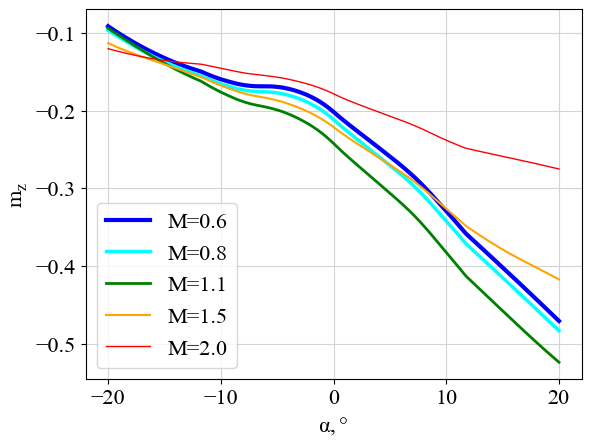

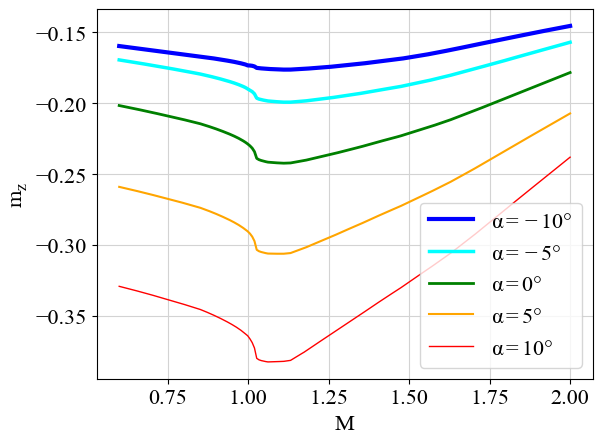

In [15]:
# Коэффициент момента тангажа
plt.title('')
plt.plot(alpha_mas, mz_M06, color = 'blue', lw = 3, label = 'M=0.6')
plt.plot(alpha_mas, mz_M08, color = 'cyan', lw = 2.5, label = 'M=0.8')
plt.plot(alpha_mas, mz_M11, color = 'green', lw = 2, label = 'M=1.1')
plt.plot(alpha_mas, mz_M15, color = 'orange', lw = 1.5, label = 'M=1.5')
plt.plot(alpha_mas, mz_M2, color = 'red', lw = 1, label = 'M=2.0')
plt.xlabel('$\\alpha, \degree$')
plt.ylabel('$m_{z}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
plt.savefig('plots\m_z(alpha).jpeg', facecolor='white')
plt.show()

plt.title('')
plt.plot(M_mas, mz_al_10, color = 'blue', lw = 3, label = '$\\alpha=-10\degree$')
plt.plot(M_mas, mz_al_5, color = 'cyan', lw = 2.5, label = '$\\alpha=-5\degree$')
plt.plot(M_mas, mz_al0, color = 'green', lw = 2, label = '$\\alpha=0\degree$')
plt.plot(M_mas, mz_al5, color = 'orange', lw = 1.5, label = '$\\alpha=5\degree$')
plt.plot(M_mas, mz_al10, color = 'red', lw = 1, label = '$\\alpha=10\degree$')
plt.xlabel('$M$')
plt.ylabel('$m_{z}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
plt.savefig('plots\m_z(M).jpeg', facecolor='white')
plt.show()

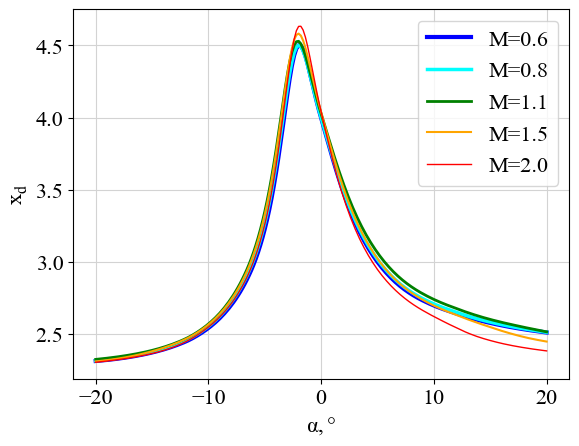

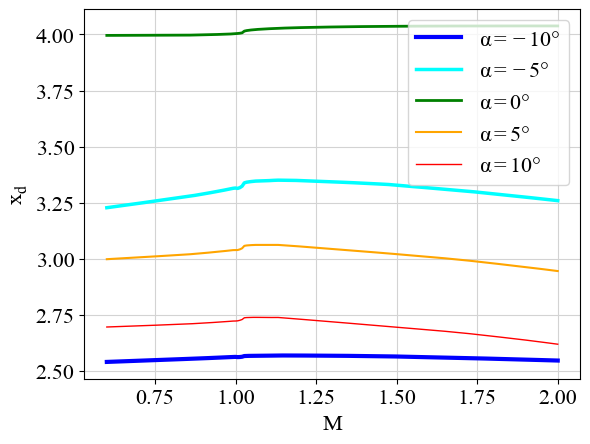

In [16]:
# Координата x центра давления
plt.title('')
plt.plot(alpha_mas, xd_M06, color = 'blue', lw = 3, label = 'M=0.6')
plt.plot(alpha_mas, xd_M08, color = 'cyan', lw = 2.5, label = 'M=0.8')
plt.plot(alpha_mas, xd_M11, color = 'green', lw = 2, label = 'M=1.1')
plt.plot(alpha_mas, xd_M15, color = 'orange', lw = 1.5, label = 'M=1.5')
plt.plot(alpha_mas, xd_M2, color = 'red', lw = 1, label = 'M=2.0')
plt.xlabel('$\\alpha, \degree$')
plt.ylabel('$x_{d}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
plt.savefig('plots\\x_d(alpha).jpeg', facecolor='white')
plt.show()

plt.title('')
plt.plot(M_mas, xd_al_10, color = 'blue', lw = 3, label = '$\\alpha=-10\degree$')
plt.plot(M_mas, xd_al_5, color = 'cyan', lw = 2.5, label = '$\\alpha=-5\degree$')
plt.plot(M_mas, xd_al0, color = 'green', lw = 2, label = '$\\alpha=0\degree$')
plt.plot(M_mas, xd_al5, color = 'orange', lw = 1.5, label = '$\\alpha=5\degree$')
plt.plot(M_mas, xd_al10, color = 'red', lw = 1, label = '$\\alpha=10\degree$')
plt.xlabel('$M$')
plt.ylabel('$x_{d}$')
plt.legend(loc = 'best')
plt.grid(color = 'lightgray')
plt.savefig('plots\\x_d(M).jpeg', facecolor='white')
plt.show()